In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
from jupyterthemes import jtplot
pc_load=pd.read_csv('~/Google Drive/WIN_Matter/analysis/data/WINPCload.csv')

pc_var=pd.read_csv('~/Google Drive/WIN_Matter/analysis/data/WINPCpercentvar.csv')

In [2]:
pc_load['Loading(corr)']

0     0.959710
1     0.882760
2     0.954890
3     0.934100
4     0.938510
5     0.313320
6     0.012970
7    -0.085367
8     0.012382
9    -0.138440
10   -0.136470
11    0.946460
12    0.176860
13    0.320270
14    0.167540
15   -0.323310
16   -0.312560
17   -0.063660
Name: Loading(corr), dtype: float64

In [3]:
#inverse PC1 so all variables are negative 
pc_load['Loading(corr)'] = pc_load['Loading(corr)'].mask(pc_load['PC Variables'] == 1, pc_load['Loading(corr)'] * (-1))

In [4]:
pc_load['Loading(corr)'] = pc_load['Loading(corr)'].mask(pc_load['PC Variables'] == 3, pc_load['Loading(corr)'] * (-1))

In [5]:
pc_load

,PC Variables,HealthVariables,Loading(corr)
0,1,weight(kg),-0.959710
1,1,W2H,-0.882760
2,1,BMI,-0.954890
3,1,DXA Tissue,-0.934100
4,1,DXA Region,-0.938510
5,1,VO2LMin,-0.313320
6,2,weight(kg),0.012970
7,2,W2H,-0.085367
8,2,BMI,0.012382
9,2,DXA Tissue,-0.138440


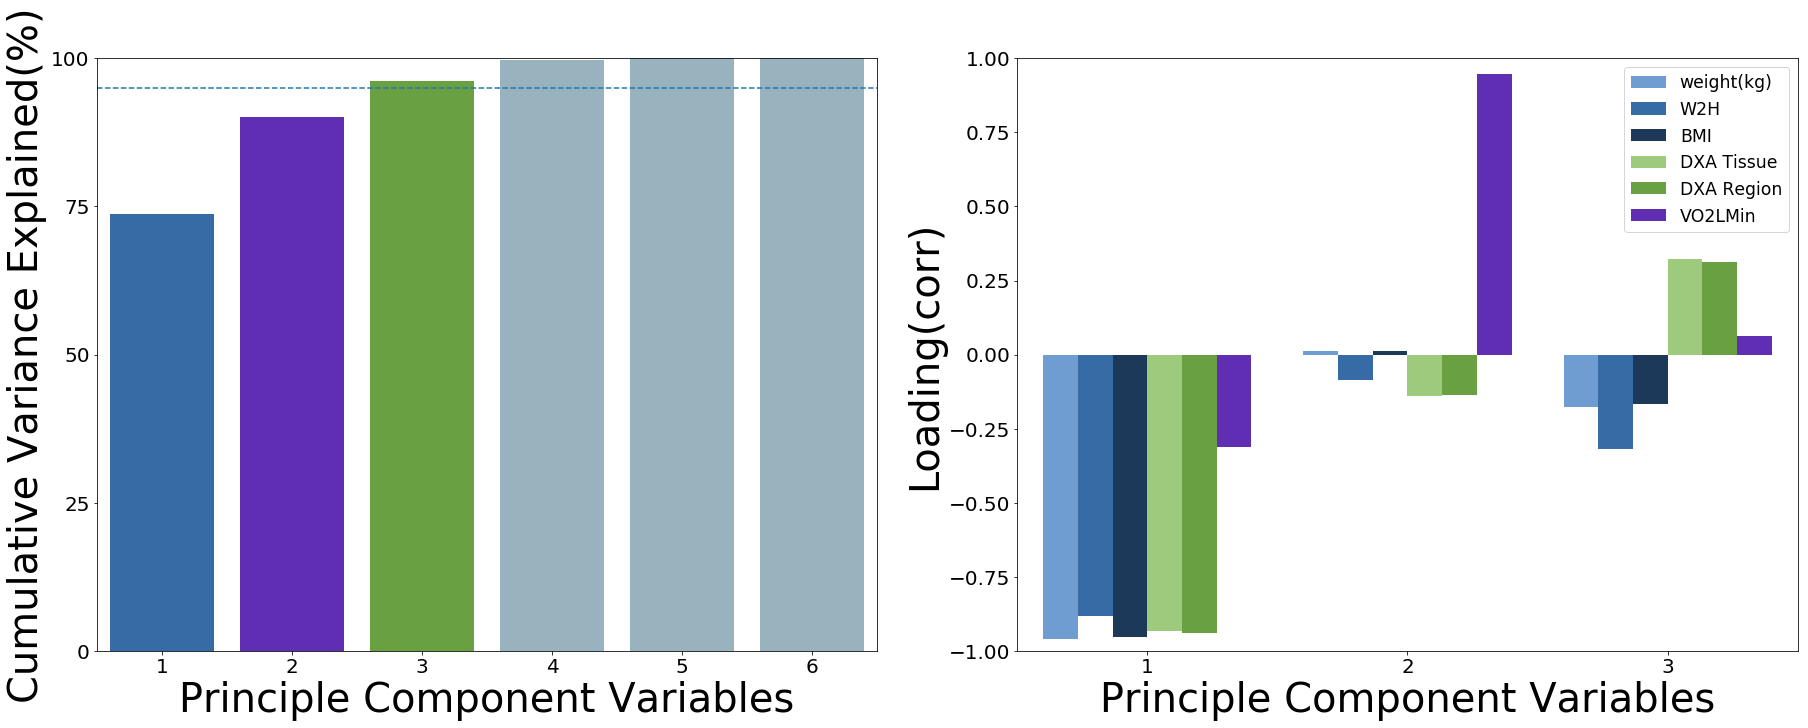

In [6]:
#Create figure space
fig=plt.figure(figsize=(25,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 2 columns
gs=gridspec.GridSpec(1,2, figure=fig)
               
               
ax1=fig.add_subplot(gs[0,0])
#setting up colors for each health variable
#PC1: blue
#PC2: purple
#PC3: light purple
#PC4-6: green
pc=pc_var.PC.unique().tolist()
pc_colors=["#236AB9","#5A18C9", "#66B032", "#92B6C4", "#92B6C4", "#92B6C4"]
pc_dict=dict(zip(pc, pc_colors))
sns.set_context=("talk")
plt.ylim(0, 100)
ax1=sns.barplot(x="PC", y="var", data=pc_var, palette=pc_dict, ax=ax1)
ax1.set_xlabel('Principle Component Variables', fontsize=40)
ax1.set_ylabel("Cumulative Variance Explained(%)",fontsize=40)
ax1.tick_params(labelsize=20)
plt.yticks([0, 25, 50, 75, 100])
plt.axhline(95, linestyle ='--')

ax2=fig.add_subplot(gs[0,1])
health=pc_load.HealthVariables.unique().tolist()
health_colors=["#609CE1","#236AB9","#133863","#9BD770", "#66B032","#5A18C9","#905BEC"]
color_dict=dict(zip(health, health_colors))
sns.set_context=('talk')
plt.ylim(-1, 1)
ax2=sns.barplot(x="PC Variables", y="Loading(corr)", hue="HealthVariables", data=pc_load, palette=color_dict, ax=ax2)
plt.legend(fontsize='xx-large')
ax2.set_ylabel("Loading(corr)",fontsize=40)
ax2.set_xlabel("Principle Component Variables", fontsize=40)
ax2.tick_params(labelsize=20)
plt.savefig("/Users/aporter1350/Google Drive/WIN_Matter/analysis/output/images/PCA_variance_Distribution/pcBarplots_inversePC.png", dpi=100, bbox_inches='tight')               
               

In [19]:
pc_var.head()

,PC,var
0,1,73.775
1,2,90.122
2,3,96.221
3,4,99.793
4,5,99.999
